In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [2]:
X,y = make_regression(n_samples=506, n_features=2, n_informative=1,noise=10,random_state=1)

X.shape, y.shape

((506, 2), (506,))

In [3]:
df = pd.DataFrame(X)
df

,0,1
0,-1.395283,0.490561
1,-0.758067,0.693366
2,0.778174,0.164665
3,0.608749,-0.864830
4,-1.391694,1.919792
...,...,...
501,-0.174180,-0.168199
502,-0.369562,-2.144444
503,-1.154983,1.309706
504,1.967102,1.273756


In [4]:
df.describe()

,0,1
count,506.000000,506.000000
mean,0.024850,0.044606
std,0.991581,0.976299
min,-2.790996,-3.053764
25%,-0.627964,-0.531705
50%,0.001813,0.086409
75%,0.725510,0.661516
max,3.958603,3.321079


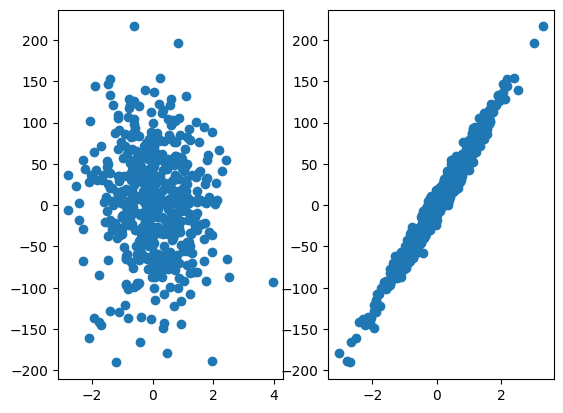

In [5]:

plt.subplot(1,2,1)
plt.scatter(X[:,0],y)

plt.subplot(1,2,2)
plt.scatter(X[:,1],y)


In [6]:
X.shape, y.shape

((506, 2), (506,))

In [7]:
ones = np.ones((X.shape[0],1))
# df = pd.DataFrame(X)
# df.insert(0,'0',value=ones)
# df
# X=df.values
# X

X = np.hstack((ones,X))
print(X.shape)

(506, 3)


In [8]:
X

array([[ 1.        , -1.39528303,  0.49056104],
       [ 1.        , -0.75806733,  0.69336623],
       [ 1.        ,  0.77817418,  0.16466507],
       ...,
       [ 1.        , -1.15498263,  1.30970591],
       [ 1.        ,  1.96710175,  1.27375593],
       [ 1.        ,  1.27852808, -0.41163916]])

In [9]:
def hypothesis(x,theta):
    y_ = 0.0
    m = x.shape[0]
    
    for i in range(m):
        y_ += theta[i]*x[i]
    
    return y_

def error(X,y,theta):
    e = 0.0
    m = X.shape[0]
    
    for i in range(m):
        y_ = hypothesis(X[i], theta)
        e += (y_ - y[i])**2
        
    return e/m

        
def gradient(X,y,theta):
    m,n = X.shape
    grad = np.zeros((n,))
    
    for j in range(n):
        for i in range(m):
            y_ = hypothesis(X[i],theta)
            grad[j] += (y_ - y[i])*X[i][j]
    
    return grad/m

def gradient_descent(X,y,max_steps=100,learning_rate=0.1):
    
    m,n = X.shape
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_steps):
        e = error(X,y,theta)
        error_list.append(e)
        
        grad = gradient(X,y,theta)
        
        for j in range(n):
            theta[j] = theta[j] - learning_rate*grad[j]
    
    return theta, error_list

In [10]:
theta, error_list = gradient_descent(X,y)

In [11]:
print(theta)

[ 0.66600369  0.11389695 63.76335651]


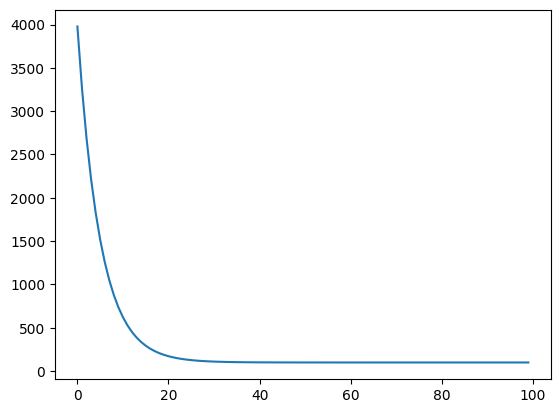

In [12]:
plt.plot(error_list)

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [14]:
model.coef_

array([ 0.        ,  0.11595767, 63.76721309])

In [15]:
model.intercept_

0.6645515026728654